<a href="https://colab.research.google.com/github/shivendr7/ml/blob/assignments/UsingCustomFilterInCNN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.models import Model
import keras.backend as K
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [2]:
(train_images,_),(_,_)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
(trainX,_),(_,_)=cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [8]:
def meanfilter(shape, dtype=None):
  f=np.array([
              [[[.3333],
                [.3333],
                [.33333]]]
  ])
  return K.variable(f, dtype='float32')
def myfilter(shape, dtype=None):
  f=np.array([
      [[[-1]],[[-1]],[[-1]]],
      [[[-1]],[[ 8]],[[-1]]],
      [[[-1]],[[-1]],[[-1]]]
  ])
  return K.variable(f, dtype='float32')

inp=Input(shape=(32,32,3))
con1=Conv2D(filters=1, kernel_size=(1,1), padding='same', kernel_initializer=meanfilter)(inp)
out=Conv2D(filters=1, kernel_size=(3,3), padding='same', kernel_initializer=myfilter)(con1)
model=Model(inputs=inp, outputs=out)
model.compile()

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 1)         4         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 1)         10        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [11]:
X=np.expand_dims(train_images, axis=-1)

In [12]:
out=model.predict(trainX[:5])

In [15]:
out.shape

(5, 32, 32, 1)

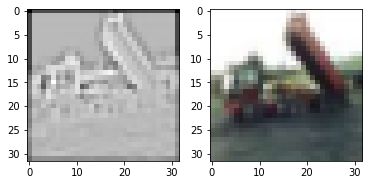

In [18]:
i=2
plt.subplot(1,2,1)
plt.imshow(out[i].reshape(32,32), cmap='gray_r')
plt.subplot(1,2,2)
plt.imshow(trainX[i], cmap='gray_r')

In [19]:
import cv2
import numpy as np
import requests
from PIL import Image, ImageFile
from io import BytesIO

In [20]:
url="https://gh.cdn.sewest.net/assets/ident//news/d81c6286/Avenger_Blog_IronMan_Artwork_3-663lb99uz.jpg?quality=65&width=1280px&height=720px"
response= requests.get(url)
img=Image.open(BytesIO(response.content))
#img.load()

In [24]:
imgar=np.asarray(img)
imgar.shape

(720, 1280, 3)

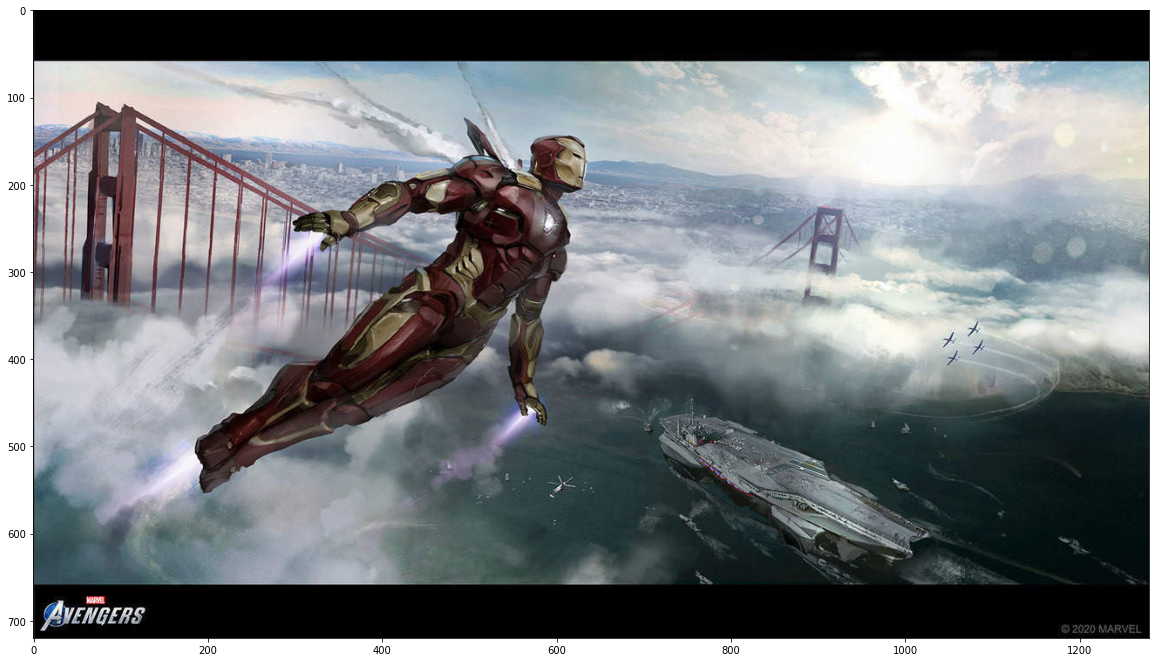

In [35]:
plt.figure(figsize=(20,20))
plt.imshow(imgar)

In [26]:
def custom_model():
  inp=Input(shape=(720,1280,3))
  con1=Conv2D(filters=1, kernel_size=(1,1), padding='same', kernel_initializer=meanfilter)(inp)
  out=Conv2D(filters=1, kernel_size=(3,3), padding='same', kernel_initializer=myfilter)(con1)
  model=Model(inputs=inp, outputs=out)
  model.compile()
  return model
lap=custom_model()
lap.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 720, 1280, 3)]    0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 720, 1280, 1)      4         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 720, 1280, 1)      10        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [28]:
out=lap.predict(imgar.reshape(1,720,1280,3))
out.shape

(1, 720, 1280, 1)

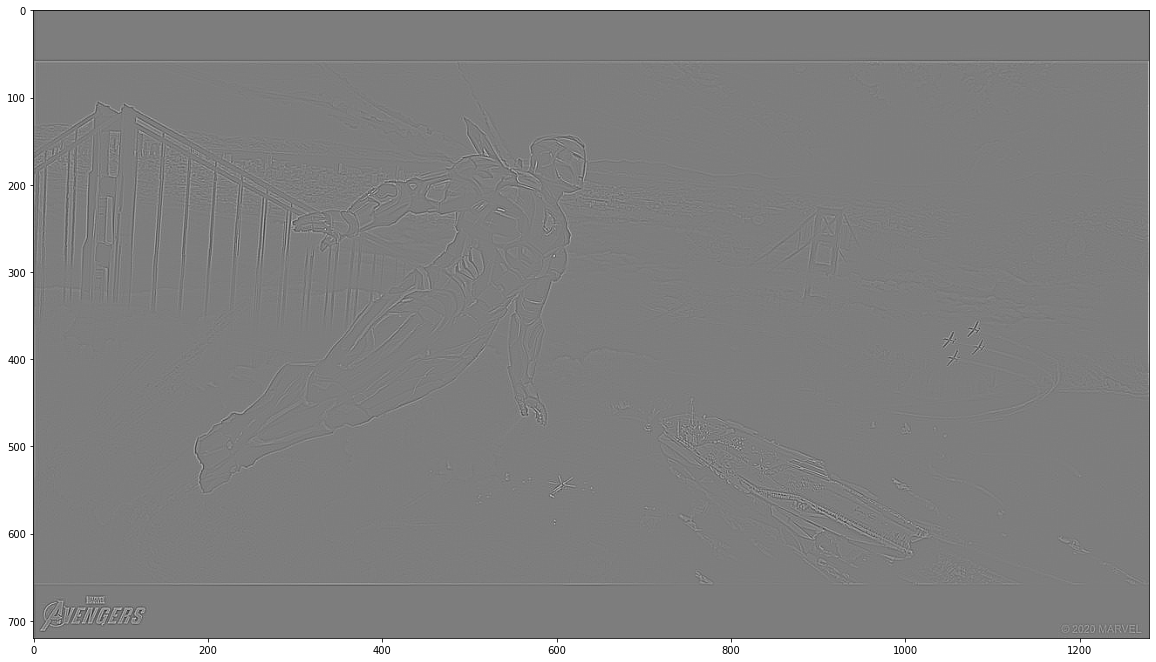

In [34]:
plt.figure(figsize=(20,20))
plt.imshow(out.reshape(720,1280), cmap='gray')